In [2]:
import sys, cv2,dlib, time
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import os

In [4]:

PREDICTOR_PATH = "shape_predictor_5_face_landmarks.dat"

In [5]:
faceDetector = dlib.get_frontal_face_detector()

# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [6]:
# get the aligned face
def get_aligned_face(im):
  # Detect faces in the image
  #print('image tensor is',im)
  faceRects = faceDetector(im, 0)
  print("Number of faces detected: ",len(faceRects))

  # Detect landmarks.
  points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
  print('length of points is', points)

  #len(points)

  points = np.array(points)
  print('after np array',len(points))
  # Convert image to floating point in the range 0 to 1
  im = np.float32(im)/255.0

  # Dimensions of output image
  h = 600
  w = 600

  # Normalize image to output coordinates.
  if len(points) > 0:
    imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

    imNorm = np.uint8(imNorm*255)
    return imNorm
  else:
    return im

In [7]:
#plt.imshow('/content/drive/My Drive/FaceDetector/YTDPY.jpg')
#plt.title("Original Image")
#plt.show()


img1 = cv2.imread('./YTDPY.jpg')
#img1 = cv2.imread('./images.jpg')
#img1 = cv2.imread('/content/arvind.jpg')

im1Display = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#im2Display = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#img1Warped = np.copy(img2)

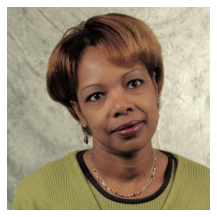

In [8]:
plt.figure(figsize = (8,8))
plt.subplot(121); plt.imshow(im1Display); plt.axis('off');

In [9]:
alignedIm1Display=get_aligned_face(im1Display)

Number of faces detected:  1
length of points is [(264, 149), (237, 160), (163, 182), (192, 174), (231, 213)]
after np array 5


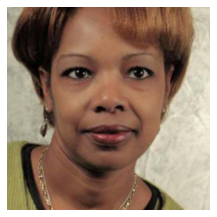

In [10]:
plt.figure(figsize = (8,8))
plt.subplot(121); plt.imshow(alignedIm1Display); plt.axis('off');